In [48]:
import os
import sys
sys.path.insert(0, os.path.realpath('__file__'))

import numpy as np
import matplotlib.pyplot as plt
from sdypy import EMA

The experiment is shown in the figure below; the beam was excited at 6 locations with an impact hammer, while the response was measured at 7 locations using piezo accelerometers (camera data is not used in this showcase; for image EMA, see https://github.com/ladisk/ImageBasedModalAnalysisTutorial):
<img width=500 src="./data/experiment_1.jpg">

Loading experimental data:

In [49]:
freq, H1_main = np.load("./data/acc_data.npy", allow_pickle=True)

Frequency vector was truncated for zero frequency:

In [50]:
freq[:10]

array([ 1.00019535,  2.0003907 ,  3.00058605,  4.0007814 ,  5.00097675,
        6.0011721 ,  7.00136745,  8.00156281,  9.00175816, 10.00195351])

And from the FRF (`H1_main` is of dimensions: #inputs, #outputs, frequency) only the response accelerometer position at index 1 will be used later:

In [51]:
selected_response = 1
FRF = H1_main[:,selected_response,:]

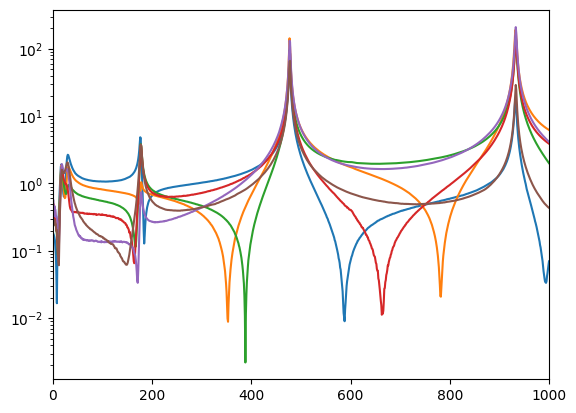

In [52]:
plt.semilogy(freq, np.abs(FRF.T));
plt.xlim(0,1000);

Initiate the pyEMA object:

In [35]:
acc = EMA.Model(frf=FRF, 
                 freq=freq,
                 lower=10, 
                 upper=5000,
                 pol_order_high=60)

Get the poles:

In [36]:
acc.get_poles()

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 124.33it/s]


Select stable poles from the stabilisation chart:

In [37]:
acc.select_poles()

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 155.44it/s]


<Figure size 640x480 with 0 Axes>

As an alternative to selecting from the stabilisation chart, the frequencies can be defined as a list, e.g. (comment out to use):

In [38]:
#n_freq =  [176,476,932,1534,2258,3161,4180]
#acc.select_closest_poles(n_freq)

Reconstruction of FRF

In [39]:
frf_rec, modal_const = acc.get_constants(whose_poles='own', FRF_ind='all', upper_r=False)

The selected natural frequencies and corresponding damping factors:

In [40]:
acc.print_modal_data()

   Nat. f.      Damping
-----------------------
1)  176.1	0.0087
2)  476.5	0.0020
3)  932.3	0.0015
4) 1534.8	0.0020
5) 2286.3	0.0028
6) 3161.7	0.0024
7) 4181.0	0.0015


Modal constants are of shape (`n_locations` $\times$ `n_frequencies`):

In [41]:
acc.A.shape

(6, 7)

In [42]:
acc.A[:, 0]

array([ 1.38453073e-05+3.75470831e-05j, -3.78356547e-05-5.88831406e-06j,
       -3.33460277e-06-2.83088198e-05j,  3.01596687e-05-2.43280711e-05j,
        2.47598393e-05-3.41954593e-06j, -1.29522065e-05+2.79361532e-05j])

Show normal modes (first three):

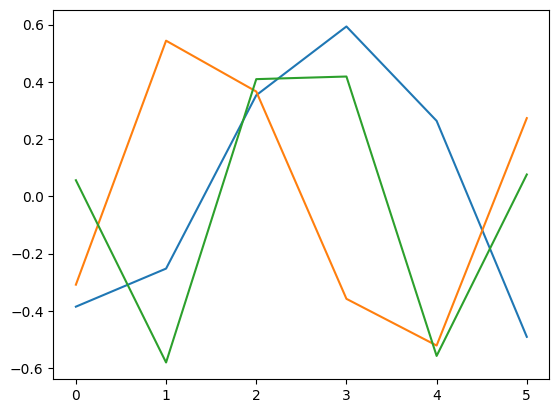

In [43]:
plt.plot(acc.normal_mode()[:, :3]);

Upper and lower residuals can also be called:

In [44]:
acc.UR, acc.LR

(array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]),
 array([ 0.90851173+0.09827511j,  0.44144623-0.09059082j,
         0.31403198-0.12294565j,  0.41890692+0.06668959j,
         0.14135394+0.01231401j, -0.41231717-0.14359388j]))

Check out the Auto Modal Assurance Criterion.

In [45]:
autoMAC = acc.autoMAC()

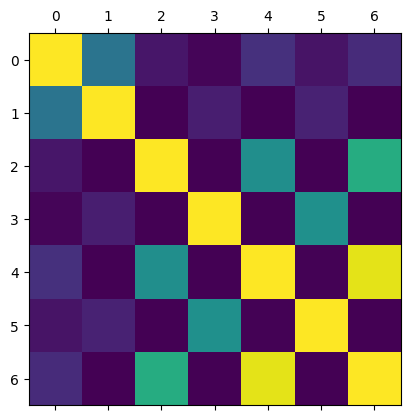

In [46]:
plt.matshow(autoMAC);

Showing the reconstructed FRF

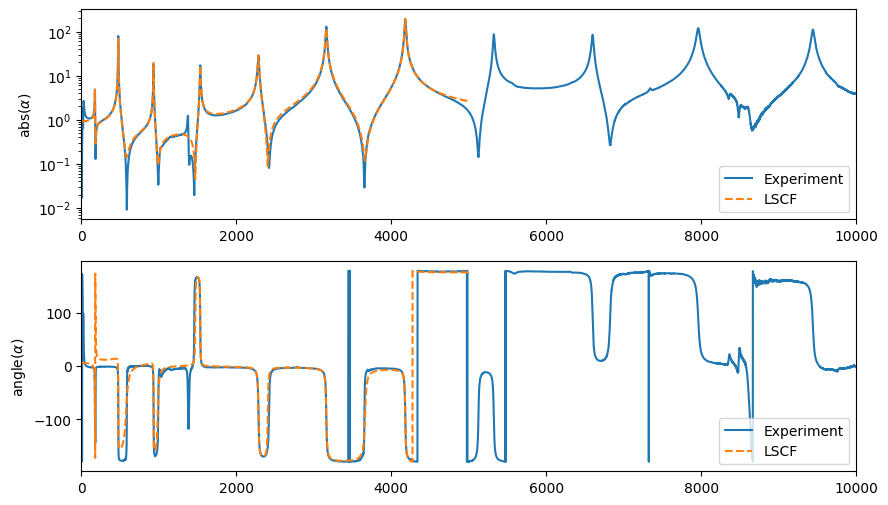

In [47]:
freq_a = acc.freq
select_loc = 0

plt.figure(figsize = ((10,6)))
plt.subplot(211)

plt.semilogy(freq, np.abs(FRF[select_loc]), label='Experiment')
plt.semilogy(freq_a, np.abs(frf_rec[select_loc]),'--', label='LSCF')
plt.xlim(0,freq[-1])
plt.ylabel(r"abs($\alpha$)")

plt.legend(loc = 'best')

plt.subplot(212)
plt.plot(freq, np.angle(FRF[select_loc],deg = 1), label='Experiment')
plt.plot(freq_a, np.angle(frf_rec[select_loc],deg = 1),'--',label='LSCF')
plt.xlim(0,freq[-1])

plt.ylabel(r"angle($\alpha$)")
plt.legend(loc = 'best');